## Preparing data

In [1]:
import json
import torch
import pandas as pd
from tqdm import tqdm
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def find_element(s,l):
    for i,x in enumerate(l):
        if s==x: break
    return i
    
def return_inds(strings, list):
    return [find_element(s,list) for s in strings]

In [13]:
bench = 'BBH'
quantiles = [5, 25, 50, 75, 95]
budgets = [200, 400, 800, 1600]

In [14]:
errors = np.load(f"../results/processed_results_{bench}_quantiles_{quantiles}.npy")
errors = errors.mean(2) #avg across seeds
n_tasks, n_llms, n_methods, n_budgets, n_quantiles = errors.shape
n_tasks, n_llms, n_methods, n_budgets, n_quantiles

(15, 11, 8, 4, 5)

In [15]:
with open("../data/Ys.pickle", 'rb') as handle: 
    Ys = pickle.load(handle)
tasks = list(Ys[bench].keys())
n_tasks==len(tasks)

True

In [16]:
methods_names_full = ['avg', 
                      'PE-Rasch', 
                      'PE-discrete',
                      'PE-discrete-logreg',
                      'PE-EmbPT',
                      'PE-EmbPT-logreg',
                      'PE-EmbFT',
                      'PE-EmbFT-logreg']


methods_names_final = ['avg', 
                      'PE-Rasch', 
                      'PE-discrete',
                      'PE-EmbPT',
                      'PE-EmbFT']#,
                      #'PE-EmbFT-betas']#,
                      #'PE-thetas',
                      #'PE-thetas-betas']

errors = errors[:,:,return_inds(methods_names_final, methods_names_full),:,:]
n_methods==len(methods_names_full)

True

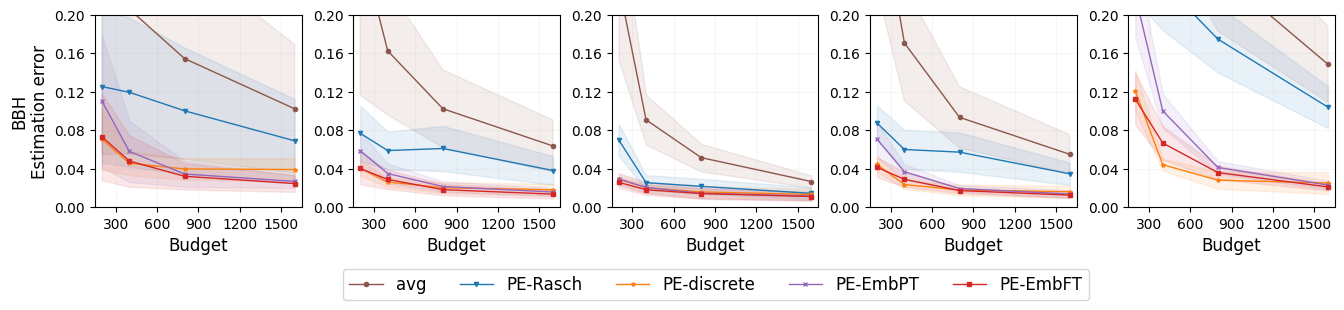

In [17]:
color_mappings = {
    'avg': '#8c564b', 
    'PE-Rasch': '#1f77b4', 
    'PE-discrete': '#ff7f0e',
    'PE-EmbPT': '#9467bd',
    'PE-EmbFT': '#d62728',
    'PE-EmbFT-betas': '#2ca02c',
    'PE-thetas': '#1f77b4',
    'PE-thetas-betas': '#2ca02c',
    'PE-emb_ft_id-logreg': '#2ca02c'
}

style = {"markersize":3, "markeredgewidth":1, "linewidth":1, "linestyle":'-'}
markers = ['o', 'v', '*', 'x', 's', 'p', 'd', '^']

errors_agg = errors.mean(0) #avg across tasks

fig, axes = plt.subplots(nrows=1, ncols=len(quantiles), figsize=(len(quantiles)*3.2, 2.5))

for k,quant in enumerate(quantiles):
    ax = axes[k]
    for j,m in enumerate(methods_names_final):#

        ax.plot(budgets, errors_agg.mean(0)[j,:,k], label=methods_names_final[j], marker=markers[j], color=color_mappings[m], **style)
        ax.fill_between(budgets, errors_agg .mean(0)[j,:,k]-errors_agg .std(0)[j,:,k], errors_agg .mean(0)[j,:,k]+errors_agg .std(0)[j,:,k], color=color_mappings[m], alpha=.1)
        
    if k==0: ax.set_ylabel(f'{bench}\nEstimation error', fontsize=12)
    ax.set_ylim(0,.2)
    ax.set_xlim(budgets[0]-50,budgets[-1]+50)
    if bench == 'BBH': ax.set_xlabel('Budget', fontsize=12)
    if bench == 'MMLU': ax.set_title(f"{quant}-th Quantile", fontsize=13)
    ax.grid(alpha=.1)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))  # 5 ticks for the x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))  # 5 ticks for the y-axis
    
if bench == 'BBH': ax.legend(loc='right', ncol=errors_agg.shape[1], bbox_to_anchor=(-.15,-.4), fontsize=12)

plt.subplots_adjust(wspace=0.25)
plt.savefig(f'../plots/agg-{bench}.pdf', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

causal_judgement


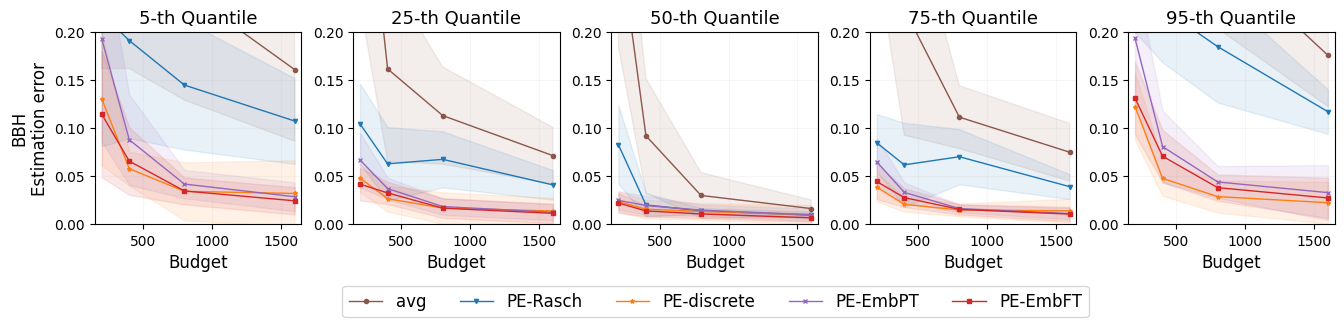

disambiguation_qa


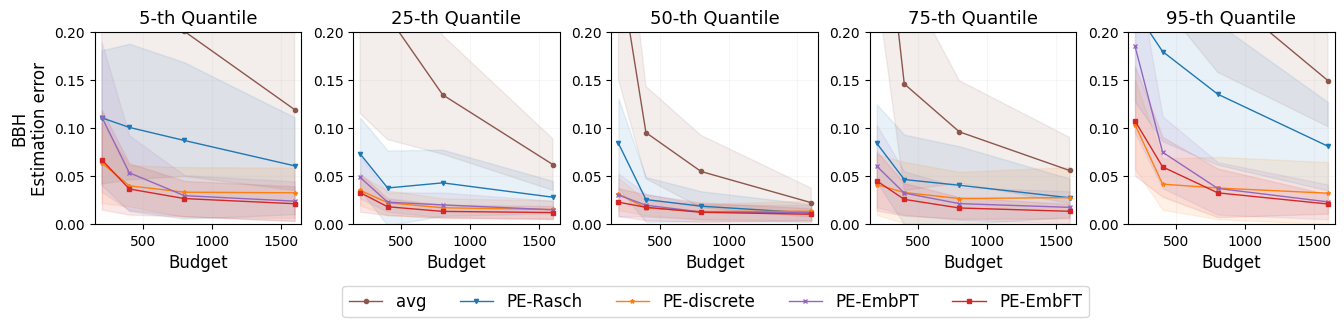

formal_fallacies


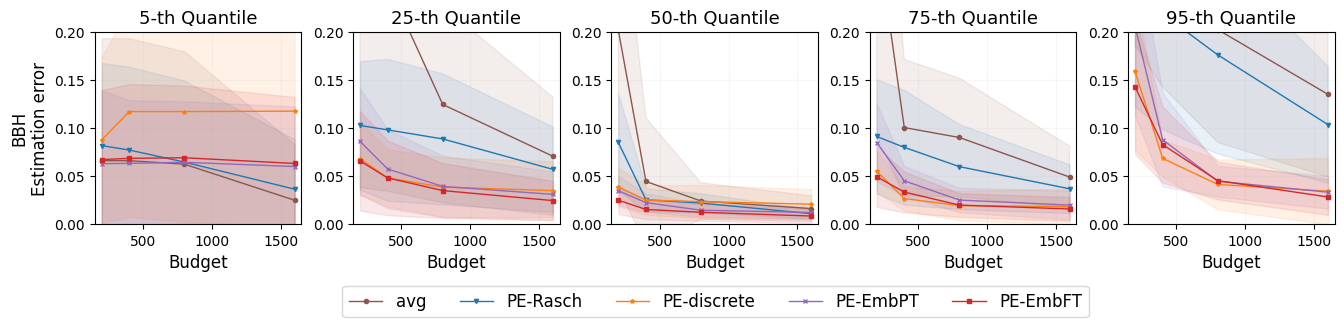

geometric_shapes


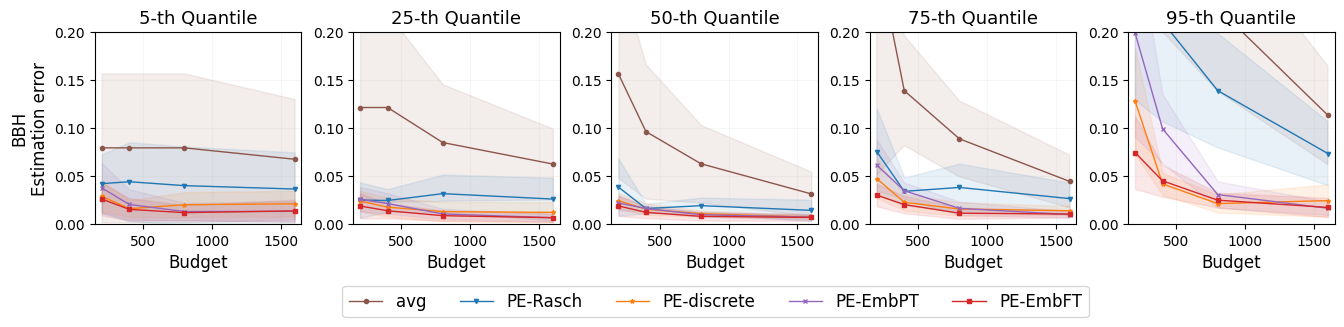

hyperbaton


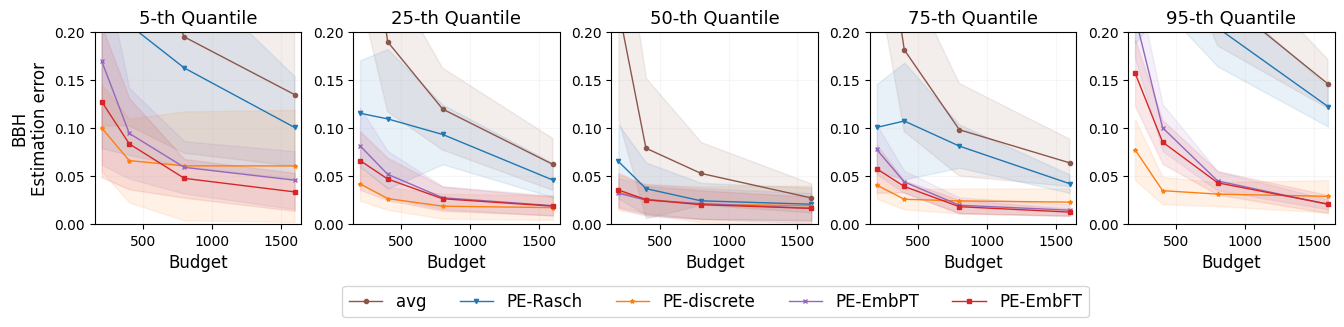

logical_deduction_five_objects


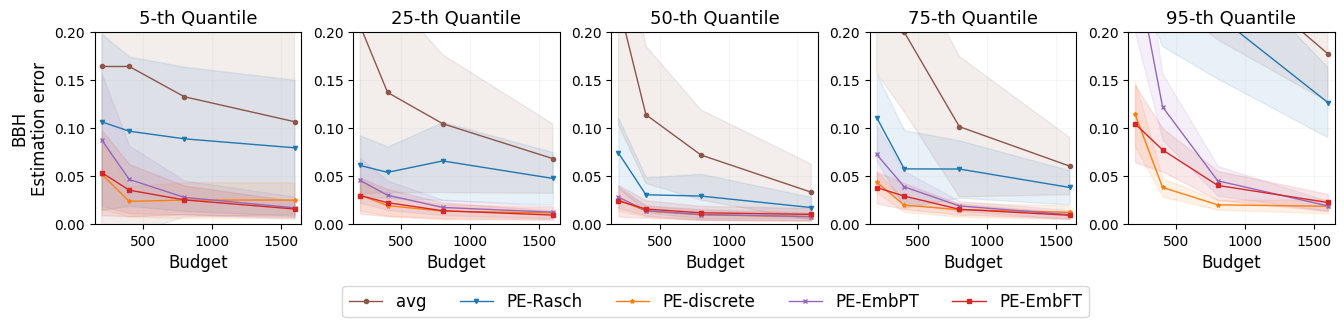

logical_deduction_seven_objects


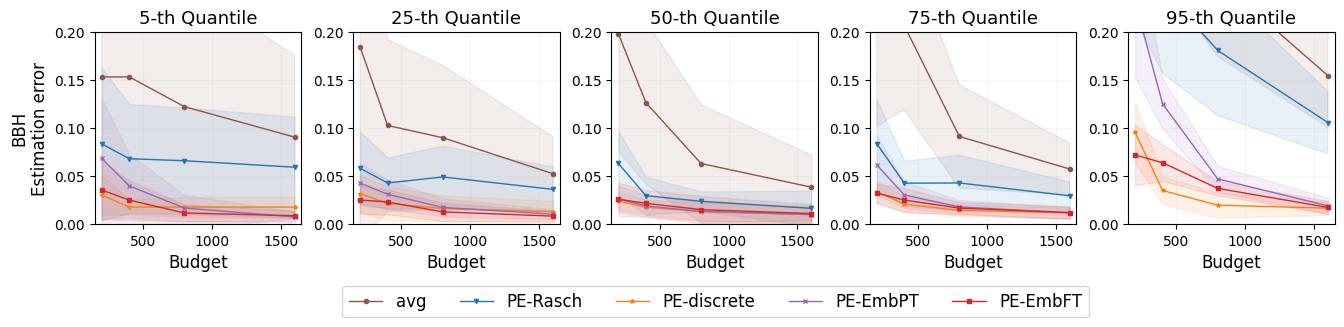

logical_deduction_three_objects


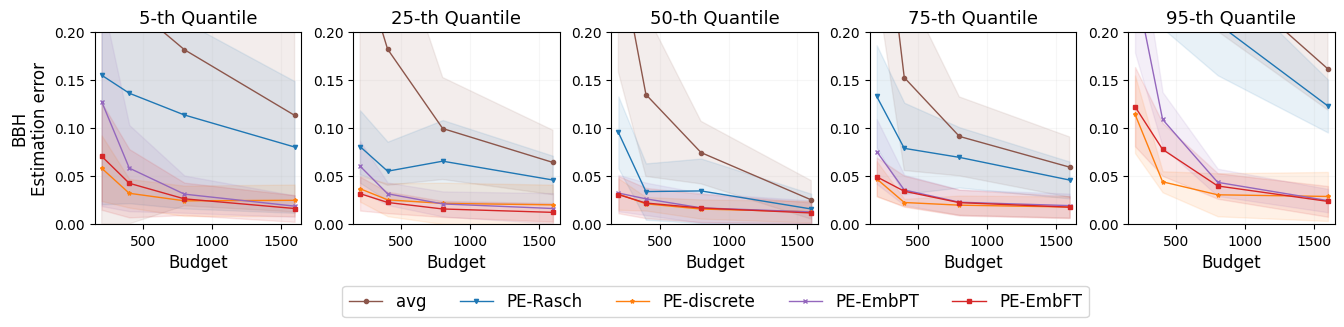

movie_recommendation


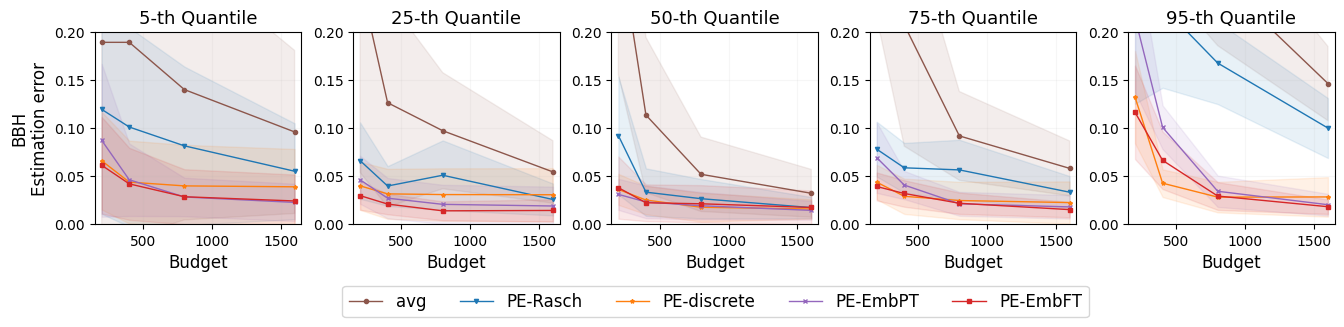

navigate


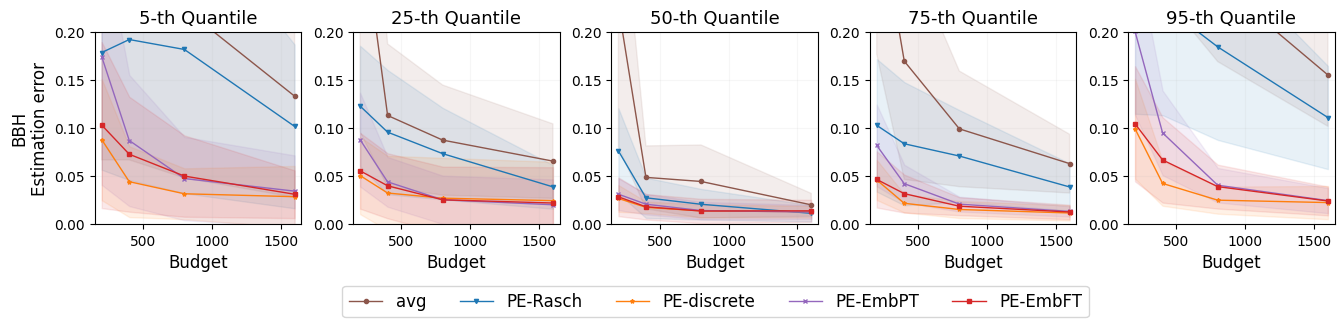

penguins_in_a_table


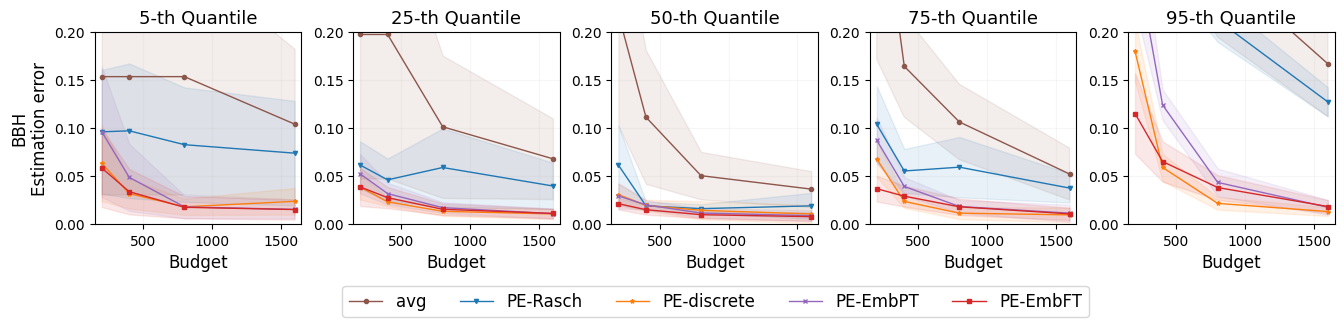

ruin_names


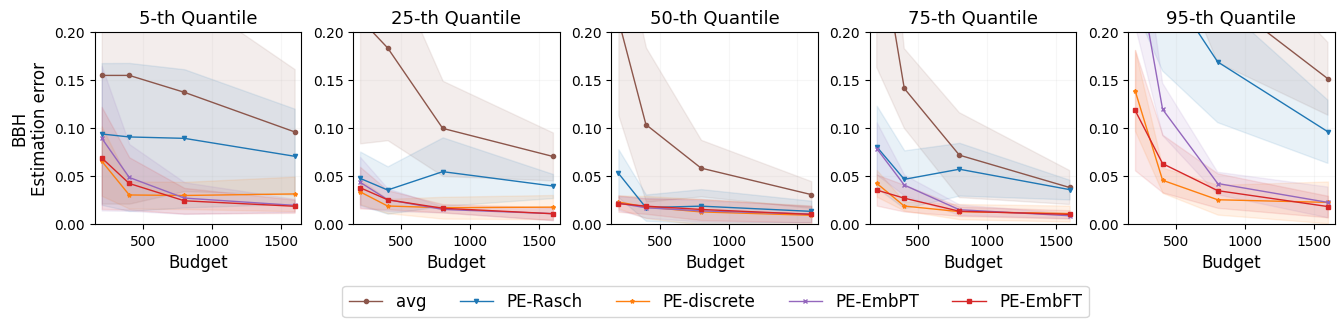

salient_translation_error_detection


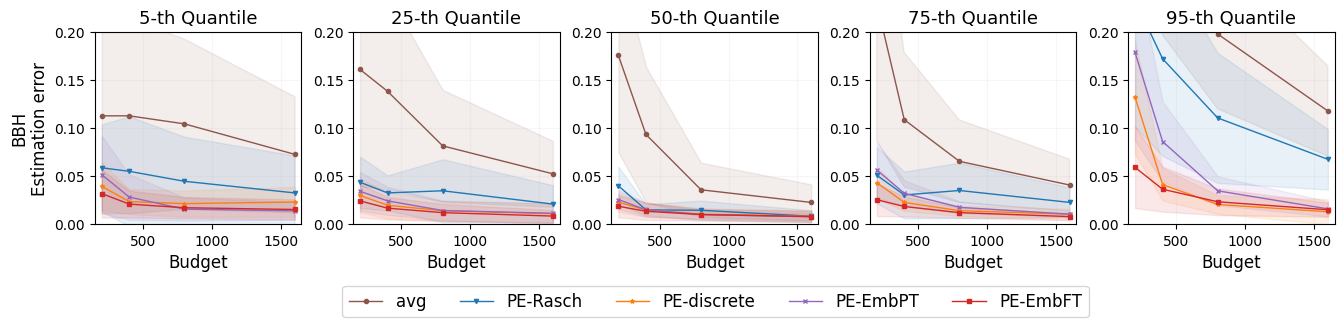

snarks


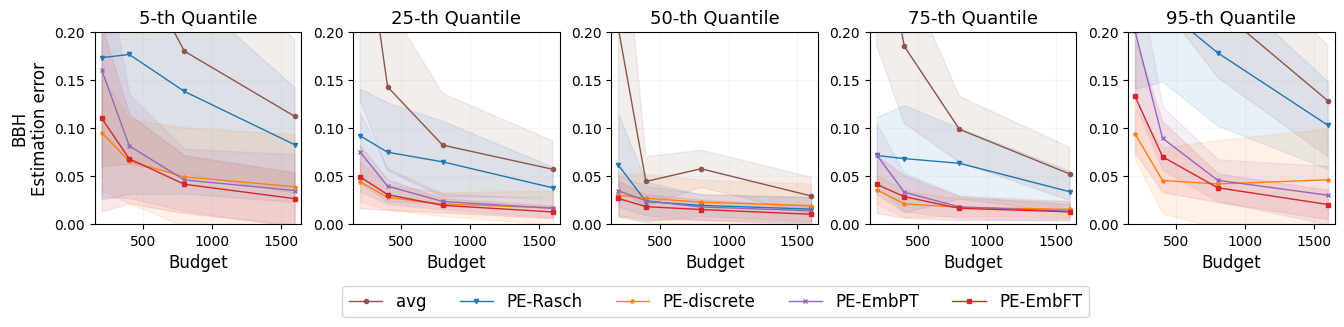

sports_understanding


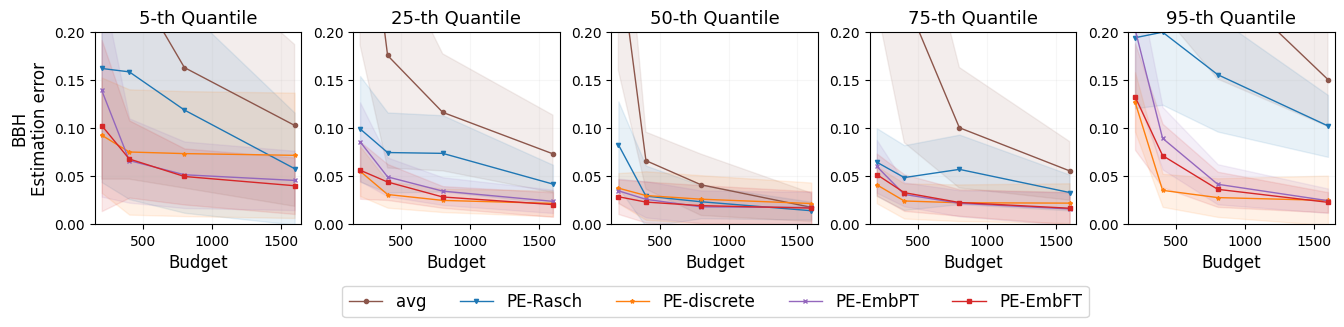

In [18]:
for t,task in enumerate(tasks):
    print(task)
    errors_agg = errors[t] #avg across tasks
    
    fig, axes = plt.subplots(nrows=1, ncols=len(quantiles), figsize=(len(quantiles)*3.2, 2.5))
    
    for k,quant in enumerate(quantiles):
        ax = axes[k]
        for j,m in enumerate(methods_names_final):#
    
            ax.plot(budgets, errors_agg.mean(0)[j,:,k], label=methods_names_final[j], marker=markers[j], color=color_mappings[m], **style)
            ax.fill_between(budgets, errors_agg .mean(0)[j,:,k]-errors_agg .std(0)[j,:,k], errors_agg .mean(0)[j,:,k]+errors_agg .std(0)[j,:,k], color=color_mappings[m], alpha=.1)
            
        if k==0: ax.set_ylabel(f'{bench}\nEstimation error', fontsize=12)
        ax.set_ylim(0,.2)
        ax.set_xlim(budgets[0]-50,budgets[-1]+50)
        ax.set_xlabel('Budget', fontsize=12)
        ax.set_title(f"{quant}-th Quantile", fontsize=13)
        ax.grid(alpha=.1)
    
    ax.legend(loc='right', ncol=errors_agg.shape[1], bbox_to_anchor=(-.15,-.4), fontsize=12)
    
    plt.subplots_adjust(wspace=0.25)
    plt.savefig(f'../plots/agg-{bench}-{task}.pdf', bbox_inches='tight', dpi=400, transparent=False)
    plt.show()

In [19]:
benchs = ['MMLU','LMentry','BBH']

methods_names_final = ['avg', 
                      'PE-Rasch', 
                      'PE-discrete',
                      'PE-EmbPT',
                      'PE-EmbFT']

style = {"markersize":3, "markeredgewidth":1, "linewidth":1, "linestyle":'-'}
markers = ['o', 'v', '*', 'x', 's', 'p', 'd', '^']

In [20]:
errors = np.load(f"../results/processed_results_{'BBH'}_dist.npy")
errors.shape

(15, 11, 5, 8, 4)

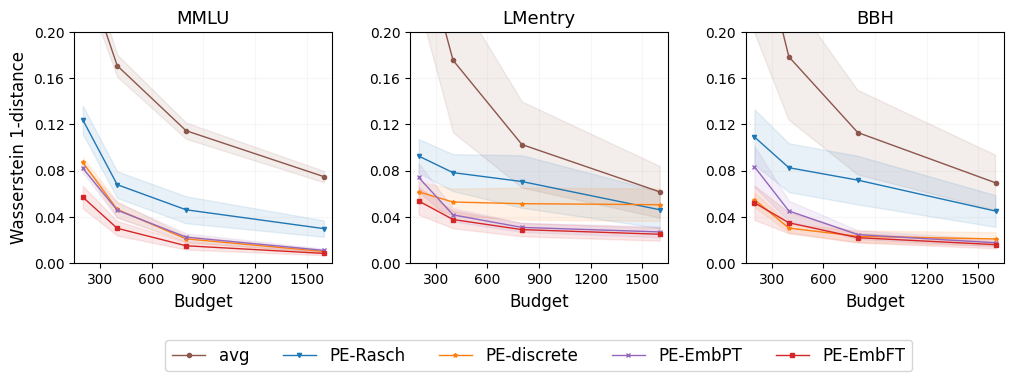

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=len(benchs), figsize=(4*len(benchs), 3))

for k,bench in enumerate(benchs):
    errors = np.load(f"../results/processed_results_{bench}_dist.npy")
    errors = errors.mean(2) #seeds
    errors = errors[:,:,return_inds(methods_names_final, methods_names_full),:]
    errors_agg = errors.mean(0) #avg across tasks
    
    ax = axes[k]
    for j,m in enumerate(methods_names_final):#
    
        ax.plot(budgets, errors_agg.mean(0)[j,:], label=methods_names_final[j], marker=markers[j], color=color_mappings[m], **style)
        ax.fill_between(budgets, errors_agg .mean(0)[j,:]-errors_agg .std(0)[j,:], errors_agg .mean(0)[j,:]+errors_agg .std(0)[j,:], color=color_mappings[m], alpha=.1)
        
    if k==0: ax.set_ylabel(f'Wasserstein 1-distance', fontsize=12)
    ax.set_ylim(0,.2)
    ax.set_xlim(budgets[0]-50,budgets[-1]+50)
    ax.set_xlabel('Budget', fontsize=12)
    ax.set_title(f"{bench}", fontsize=13)
    ax.grid(alpha=.1)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))  # 5 ticks for the x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))  # 5 ticks for the y-axis

    if bench == 'BBH': ax.legend(loc='right', ncol=6, bbox_to_anchor=(.675,-.4), fontsize=12)
    
plt.subplots_adjust(wspace=0.3)
plt.savefig(f'../plots/agg-wass.pdf', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

In [22]:
methods_names_final = ['PE-EmbPT']

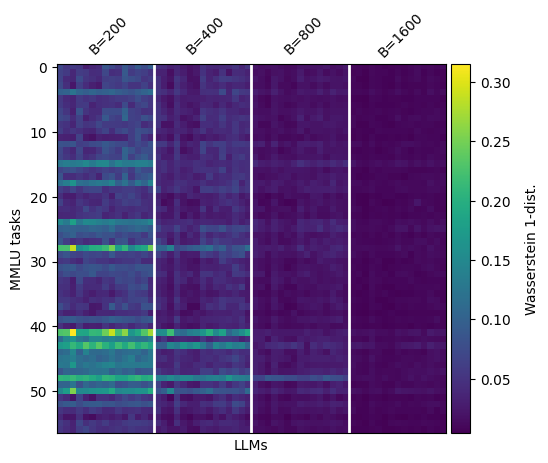

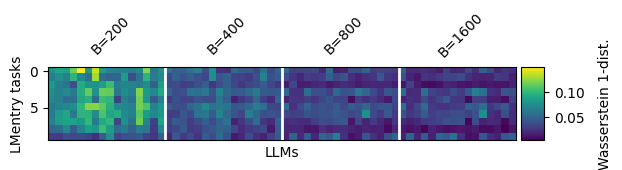

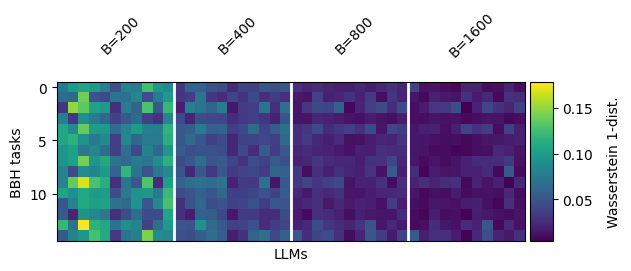

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

benchs = ['MMLU', 'LMentry', 'BBH']

for bench in benchs:
    errors = np.load(f"../results/processed_results_{bench}_dist.npy")
    errors = errors.mean(2)  # seeds
    errors = errors[:, :, return_inds(methods_names_final, methods_names_full), :].squeeze()
    
    fig, ax = plt.subplots()
    
    # Plot the heatmap
    im = ax.imshow(np.hstack([errors[:, :, b] for b in range(len(budgets))]))
    ax.set_xlabel('LLMs')
    ax.set_ylabel(f'{bench} tasks')
    
    # Create an axes divider for the colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    # Add the colorbar
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label('Wasserstein 1-dist.', labelpad=10, loc='center')
    cbar.ax.xaxis.set_label_position('top')

    # Vertically divide the plot into sections and add labels
    for b in range(1, len(budgets)):
        y_position = b * errors.shape[1] - 0.5
        ax.axvline(x=y_position, color='white', linewidth=2, linestyle='-')  # Customize the line style
    
    # Add labels to each section
    for b in range(len(budgets)):
        x_position = b * errors.shape[1] + errors.shape[1] / 2
        ax.text(x_position, -5, f'B={budgets[b]}', ha='center', va='center', color='black', fontsize=10, rotation=45)
    
    ax.set_xticks([])
    fig.subplots_adjust(wspace=0.3)
    fig.savefig(f'../plots/heatmap_{bench}.pdf', bbox_inches='tight', dpi=400, transparent=False)
    plt.show()
